In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sp

In [3]:
df=pd.read_csv("Fraud_check (2).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df=df.rename(columns={"Taxable.Income":"taxable_income"})
df

,Undergrad,Marital.Status,taxable_income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


<AxesSubplot:ylabel='Frequency'>

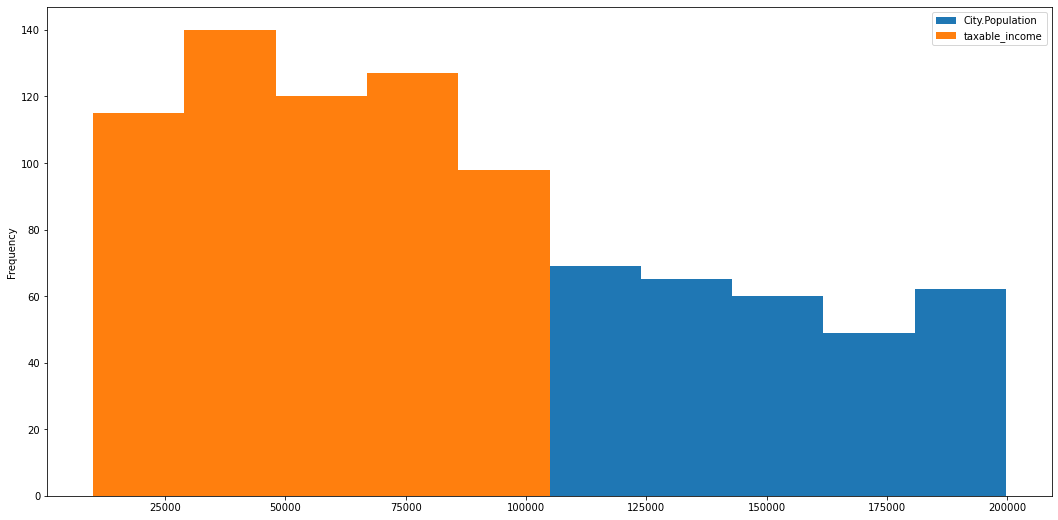

In [6]:
df[["City.Population","taxable_income"]].plot(kind="hist",figsize=(18,9))

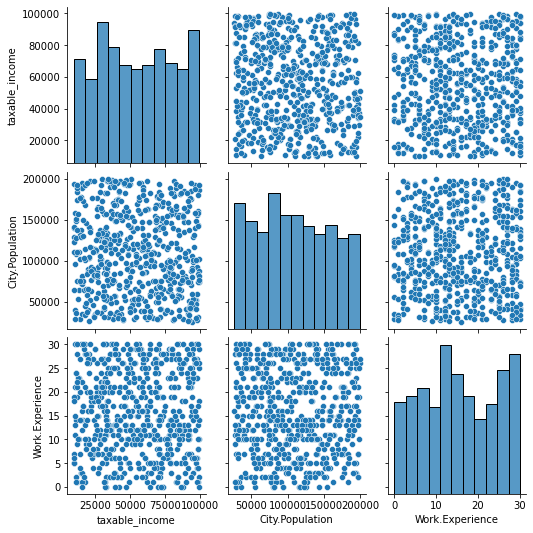

In [7]:
sp.pairplot(df)

In [8]:
df.corr()

,taxable_income,City.Population,Work.Experience
taxable_income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

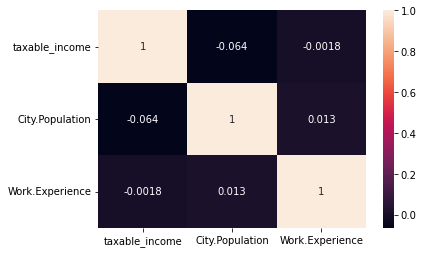

In [10]:
sp.heatmap(df.corr(),annot=True)

In [20]:
df_new=pd.get_dummies(df,columns=["Undergrad","Marital.Status","Urban"])
df_new

,taxable_income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [12]:
df_new.columns

Index(['taxable_income', 'City.Population', 'Work.Experience', 'Undergrad_NO',
       'Undergrad_YES', 'Marital.Status_Divorced', 'Marital.Status_Married',
       'Marital.Status_Single', 'Urban_NO', 'Urban_YES'],
      dtype='object')

In [21]:
df_new1= pd.cut(df_new["taxable_income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [22]:
df_new1.value_counts()

Good     476
Risky    124
Name: taxable_income, dtype: int64

In [23]:
df_new.loc[df["taxable_income"]>=30000,"income"]="Good"
df_new.loc[df["taxable_income"]<=30000,"income"]="Risky"

In [24]:
df_new.head(20)

,taxable_income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
5,33329,116382,0,1,0,1,0,0,1,0,Good
6,83357,80890,8,1,0,1,0,0,0,1,Good
7,62774,131253,3,0,1,0,0,1,0,1,Good
8,83519,102481,12,1,0,0,0,1,0,1,Good
9,98152,155482,4,0,1,1,0,0,0,1,Good


In [25]:
x=df_new[['Undergrad_YES', 'Marital.Status_Divorced', 'Urban_NO']]
y=df_new["income"]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.33)

In [50]:
model=RandomForestClassifier(n_estimators=30,max_depth=5)

In [51]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=30)

In [52]:
preds=model.predict(x_test)

In [53]:
model.score(x_test,y_test)

0.7929292929292929

In [54]:
model.score(x_train,y_train)

0.7935323383084577